# All Regression Notebook
## Load dữ liệu
Khai báo và load thư viện, sau đó load tập dữ liệu. Do tập dữ liệu không chứa tên cột nên chúng ta cần thêm nó vào bằng cách sử dụng list Python thủ công. 

Chúng ta có `all_train_data` và `all_test_data` đã được nối vào `DataFrame` tương ứng.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

columns_name = ["Popularity", "Check-in", "Activities", "Category"] \
            + ["F_{:d}".format(i) for i in range(1, 26)] \
            + ["CC{:d}".format(i) for i in range(1, 6)] \
            + ["Base time", "Post length", "Post count", "Post promotion", "Span time"] \
            + ["Post_date_{:d}".format(i) for i in range(1, 8)] \
            + ["Base_date_{:d}".format(i) for i in range(1, 8)] \
            + ["Span count"]
all_train_data = [pandas.read_csv("Dataset/Training/Features_Variant_{:d}.csv".format(d), header=None) for d in range(1, 6)]
# join all the training data
train_data = pandas.concat(all_train_data, ignore_index=True)
train_data.columns = columns_name
all_test_data = [pandas.read_csv("Dataset/Testing/TestSet/Test_Case_{:d}.csv".format(d), header=None) for d in range(1, 10)]
test_data = pandas.concat(all_test_data, ignore_index=True)
test_data.columns = columns_name

train_data["bias"] = 1
test_data["bias"] = 1

train_data.head()

,Popularity,Check-in,Activities,Category,F_1,F_2,F_3,F_4,F_5,F_6,...,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,Span count,bias
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,1
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,1,0,0,0,0,0,0,1
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,1,0,0,0,0,1


In [2]:
test_data.head()

,Popularity,Check-in,Activities,Category,F_1,F_2,F_3,F_4,F_5,F_6,...,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,Span count,bias
0,1340759,33935,49392,9,0.0,768.0,77.200000,36.5,132.861432,0.0,...,0,0,0,0,0,1,0,0,35,1
1,161455,0,5978,4,3.0,75.0,22.714286,15.0,23.389340,3.0,...,0,0,0,0,0,0,0,1,2,1
2,92385,88,34785,70,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1
3,395272,0,3406,17,0.0,22.0,4.000000,1.0,6.599663,0.0,...,1,1,0,0,0,0,0,0,0,1
4,4349418,0,614043,9,0.0,958.0,65.974194,24.0,126.960748,0.0,...,1,1,0,0,0,0,0,0,0,1


## Lựa chọn hạng mục phụ
Cột Category chứa các index bất kỳ của hạng mục dữ liệu liên quan tới bản chất của chính bài đăng. Để đơn giản, chúng ta sẽ sử dụng hạng mục có lượng dữ liệu lớn nhất để thực hiện Hồi quy Tuyến tính.

Tìm và lựa chọn hạng mục có nhiều bản ghi nhất sử dụng pandas. Lưu nó trong biến `largest_category`

In [3]:
# Viết code ở đây:
# count Category in train_data
category_count = train_data["Category"].value_counts()
# find the most popular category
largest_category = category_count.idxmax() 
largest_category

9

In [4]:
# Phân hạng các mô hình
train_data = train_data.loc[train_data['Category'] == largest_category].drop('Category', axis=1)
test_data = test_data.loc[test_data['Category'] == largest_category].drop('Category', axis=1)

label = "Span count"
features = [col for col in train_data.columns if col != label]

train_features = train_data[ features ]
train_labels = train_data[ label ]
test_features = test_data[ features ]
test_labels = test_data[ label ]


## Tương quan cơ bản
Chúng ta sẽ vẽ ma trận tương quan giữa các biến CC. Tương quan rất hữu ích để xem liệu các đặc trưng có kết nối quá chặt chẽ không -  chúng ta không muốn chúng cùng nhau vì chúng sẽ tạo ra nhiễu giả gây overfit mô hình.

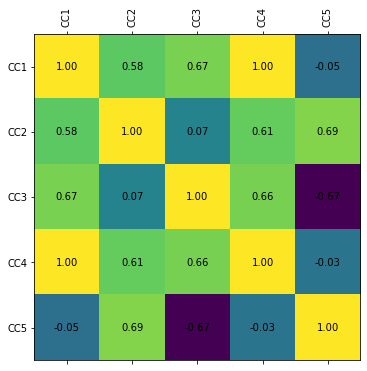

In [5]:
# Viết code ở đây:
cc_label = ["CC{:d}".format(i) for i in range(1, 6)]
cc_data = train_data[cc_label]
cc_corr = cc_data.corr()

figure = plt.figure(figsize=(12, 6))
axes = figure.add_subplot(111)
caxes = axes.matshow(cc_corr)

for (i, j), z in np.ndenumerate(cc_corr):
    axes.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
    
axes.set_xticklabels([''] + cc_label, rotation=90)
axes.set_yticklabels([''] + cc_label)
plt.show()



## Xây dựng mô hình Hồi quy

__Nhiệm vụ của chúng ta là dự đoán số lượng bình luận bài đăng sẽ nhận được (cột "Span count")__ <br>
"Span time" thì cần thiết trong khi tất cả các cột khác tùy chọn. <br>
Thử mô hình Hồi quy đa biến đơn giản chỉ có các đặc trưng cơ bản: <br>
["Popularity", "Base time", "Post length", "Post count", "Span time", "bias"]. <br>

In ra hệ số MSE từ sklearn hoặc RSS từ khóa học cho cả tập huấn luyện và tập kiểm tra.

In [6]:
# Viết code ở đây:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

simple_features = ["Popularity", "Base time", "Post length", "Post count", "Span time", "bias"]
simple_training_features = train_features[ simple_features ].values
simple_training_labels = train_labels.values

simple_test_features = test_features[ simple_features ].values
simple_test_labels = test_labels.values

simple_model = LinearRegression()
simple_model.fit(simple_training_features, simple_training_labels)
training_mse = mean_squared_error(simple_training_labels, simple_model.predict(simple_training_features))
print("Training MSE: {:0.2f}".format(training_mse))
testing_mse = mean_squared_error(simple_test_labels, simple_model.predict(simple_test_features))
print("Testing MSE: {:0.2f}".format(testing_mse))

Training MSE: 1689.57
Testing MSE: 5340.59


### Hãy thử cải thiện với nhiều đặc trưng hơn
Không phải mô hình tốt nhất chúng ta có thể sử dụng. Chúng ta có thể thử thêm nhiều đặc trưng liên quan. <br>Nối tất cả các thuộc tính CC vào các đặc trưng và thử lại với cùng số liệu.

In [7]:
# Viết code ở đây:
linear_model = LinearRegression()
linear_model.fit(train_features.values , train_labels.values)

training_mse = mean_squared_error(train_labels.values, linear_model.predict(train_features.values))
print("Training MSE: {:0.2f}".format(training_mse))
testing_mse = mean_squared_error(test_labels.values, linear_model.predict(test_features.values))
print("Testing MSE: {:0.2f}".format(testing_mse))

Training MSE: 1512.26
Testing MSE: 3925.32


Bài học rút ra: Tối ưu hóa sớm hiếm khi hữu ích. 

## Giải quyết overfit
### Áp dụng cách giải cho overfit

Sự khác biệt về hệ số huấn luyện và kiểm tra chỉ ra mô hình có thể overfitting. Hãy thử sửa chữa. Mở rộng hồi quy [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) (cv = 10) với alpha dọc theo logspace giữa 0 và 10, ghi nhận giá trị có chất lượng tốt nhất thành biến `best_alpha`, và *có thể tùy chọn vẽ một đồ thị cho độ lớn của các hệ số*.

In [8]:
# Viết code ở đây:
# Cach 1
from sklearn.linear_model import RidgeCV

alphas = np.logspace(0, 10, num=10)

ridgeCV = RidgeCV(alphas=alphas, cv=10)
ridgeCV.fit(train_features.values, train_labels.values)
best_alpha = ridgeCV.alpha_
print("Best alpha: {:0.2f}".format(best_alpha))

Best alpha: 2154.43


In [9]:
ridgeCV.best_score_

0.2653964048898568

Best Ridge alpha: 2154.4347


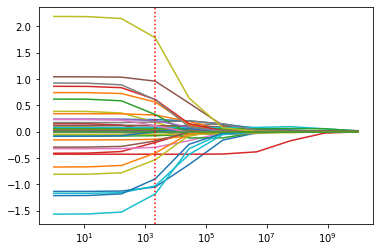

In [10]:
# Cach 2
coefs = []
best_alphas = []
best_scores = []

for a in alphas:
    ridgeCV = RidgeCV(alphas=[a], cv=10)
    ridgeCV.fit(train_features.values, train_labels.values)
    coefs.append(ridgeCV.coef_)
    best_alphas.append(ridgeCV.alpha_)
    best_scores.append(ridgeCV.best_score_)

best_ridge_alpha = best_alphas[np.argmax(best_scores)]
print("Best Ridge alpha: {:0.4f}".format(best_ridge_alpha))
plt.semilogx(alphas, coefs)
plt.axvline(x=best_ridge_alpha, color='r', linestyle=':')
plt.show()
#plt.legend(train_features.keys())

In [11]:
print("total fearures: \n{}".format(train_features.keys()))
print("features when using best_alpha: \n {}".format(train_features.keys()[coefs[np.argmax(best_scores)] != 0]))

total fearures: 
Index(['Popularity', 'Check-in', 'Activities', 'F_1', 'F_2', 'F_3', 'F_4',
       'F_5', 'F_6', 'F_7', 'F_8', 'F_9', 'F_10', 'F_11', 'F_12', 'F_13',
       'F_14', 'F_15', 'F_16', 'F_17', 'F_18', 'F_19', 'F_20', 'F_21', 'F_22',
       'F_23', 'F_24', 'F_25', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time',
       'Post length', 'Post count', 'Post promotion', 'Span time',
       'Post_date_1', 'Post_date_2', 'Post_date_3', 'Post_date_4',
       'Post_date_5', 'Post_date_6', 'Post_date_7', 'Base_date_1',
       'Base_date_2', 'Base_date_3', 'Base_date_4', 'Base_date_5',
       'Base_date_6', 'Base_date_7', 'bias'],
      dtype='object')
features when using best_alpha: 
 Index(['Popularity', 'Check-in', 'Activities', 'F_1', 'F_2', 'F_3', 'F_4',
       'F_5', 'F_6', 'F_7', 'F_8', 'F_9', 'F_10', 'F_11', 'F_12', 'F_13',
       'F_14', 'F_15', 'F_16', 'F_17', 'F_18', 'F_19', 'F_20', 'F_21', 'F_22',
       'F_23', 'F_24', 'F_25', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time',

### Thử Hồi quy RidgeCV trên mọi cột
Nó đã hoạt động, nhưng chúng ta cần tự hỏi liệu có tiếp tục sử dụng tập đặc trưng không hoàn thiện thay vì một tập hợp tối ưu nữa không. Mở rộng các đặc trưng cho tất cả các cột trừ nhãn được chỉ định. Hãy chạy và xem điều gì sẽ xảy ra.

In [12]:
ridgeCV = RidgeCV(alphas=[best_alpha], cv=10)
ridgeCV.fit(train_features.values, train_labels.values)
training_mse = mean_squared_error(train_labels.values, ridgeCV.predict(train_features.values))
print("Training MSE: {:0.2f}".format(training_mse))
testing_mse = mean_squared_error(test_labels.values, ridgeCV.predict(test_features.values))
print("Testing MSE: {:0.2f}".format(testing_mse))

Training MSE: 1512.31
Testing MSE: 3929.27


## Lựa chọn đặc trưng
### Áp dụng LASSO
Chúng ta có thể cắt tỉa các đặc trưng sử dụng những gì đã học. Lần này sẽ ghi lại các đặc trưng đã chọn của [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) (cv = 10) sử dụng biến `lasso_selected_features`, và <i>có thể tùy chọn vẽ một đồ thị giữa số lượng đặc trưng đã loại và các giá trị alpha</i>.

In [13]:
# Viết code ở đây:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
label = "Span count"
features = [col for col in train_data.columns if col != label]

train_features = train_data[ features ]
train_labels = train_data[ label ]
test_features = test_data[ features ]
test_labels = test_data[ label ]

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features.values)
test_features = scaler.transform(test_features.values)

multi_model = LassoCV(cv=10)
multi_model.fit(train_features, train_labels.values)
test_predictions = multi_model.predict(test_features)

test_mse_score = mean_squared_error(test_labels.values, test_predictions)
train_mse_score = mean_squared_error(train_labels.values, multi_model.predict(train_features))
print("MSE on training: {:.4f}; MSE on test: {:.4f}".format(train_mse_score, test_mse_score))

MSE on training: 1514.0079; MSE on test: 4173.1078


**thaifx16677:** Draw something fun ~~

In [14]:
label = "Span count"
features = [col for col in train_data.columns if col != label]

train_features = train_data[ features ]
train_labels = train_data[ label ]
test_features = test_data[ features ]
test_labels = test_data[ label ]

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features.values)
train_labels = train_labels.values
test_features = scaler.transform(test_features.values)
test_labels = test_labels.values

alphas = np.logspace(0, 2, num=20)
coefs = []
train_mses = []
test_mses = []

for a in alphas:
    model = LassoCV(alphas=[a], cv=10)
    model.fit(train_features, train_labels)
    coefs.append(model.coef_)
    train_mse = mean_squared_error(train_labels, model.predict(train_features))
    test_mes = mean_squared_error(test_labels, model.predict(test_features))
    train_mses.append(train_mse)
    test_mses.append(test_mes)


In [15]:
lowest_test_mse_index = np.argmin(test_mses)
best_alpha = alphas[lowest_test_mse_index]
best_alpha

5.455594781168519

Text(0, 0.5, 'MSE')

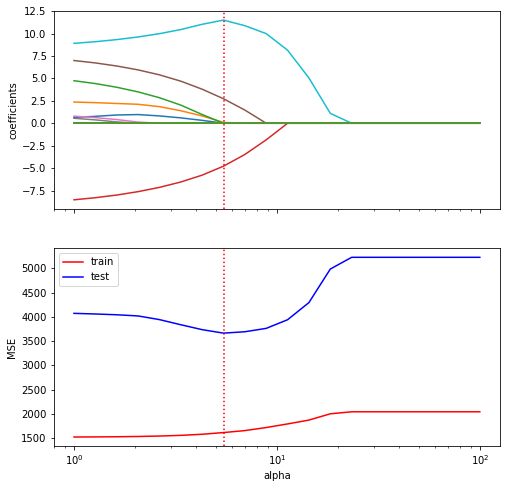

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(8, 8))

axes[0].semilogx(alphas, coefs)
axes[0].set_ylabel("coefficients")
axes[0].axvline(x=best_alpha, color='r', linestyle=':')

axes[1].plot(alphas, train_mses, label="train", color="red")
axes[1].plot(alphas, test_mses, label="test", color="blue")
axes[1].axvline(x=best_alpha, color='r', linestyle=':')
axes[1].legend(loc="best")
axes[1].set_xlabel("alpha")
axes[1].set_ylabel("MSE")

In [17]:
print("With alpha = {:0.4f}, MSE on training: {:.4f}; MSE on test: {:.4f}".format(best_alpha, 
                                                                           train_mses[lowest_test_mse_index], 
                                                                           test_mses[lowest_test_mse_index]))

With alpha = 5.4556, MSE on training: 1614.6609; MSE on test: 3664.0904


In [18]:
coefs_for_lowest_mse_test = coefs[lowest_test_mse_index]
coefs_for_lowest_mse_test
lasso_selected_features = np.array(features)[coefs_for_lowest_mse_test != 0].tolist()
lasso_selected_features

['F_8', 'F_9', 'CC2', 'Base time', 'Post count']

In [19]:
feature_map = [np.array(features)[coef != 0].tolist() for coef in coefs]

In [20]:
summary_data = {"Test MSE (LASSO)": test_mses, "Train MSE (LASSO)": train_mses,"Features": feature_map}
summary_data_fm = pandas.DataFrame(summary_data)
summary_data_fm

,Test MSE (LASSO),Train MSE (LASSO),Features
0,4072.276107,1522.914384,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos..."
1,4059.004327,1525.049865,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos..."
2,4042.813333,1528.517487,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos..."
3,4018.752648,1534.081414,"[F_8, F_9, F_14, CC2, CC5, Base time, Post count]"
4,3943.202781,1542.821198,"[F_8, F_9, CC2, CC5, Base time, Post count]"
5,3837.366252,1556.845991,"[F_8, F_9, CC2, CC5, Base time, Post count]"
6,3736.135513,1579.619402,"[F_8, F_9, CC2, CC5, Base time, Post count]"
7,3664.090447,1614.660897,"[F_8, F_9, CC2, Base time, Post count]"
8,3692.934192,1655.414675,"[CC2, Base time, Post count]"
9,3762.571830,1718.268787,"[CC2, Base time]"


### Xây dựng mô hình chặt chẽ hơn với các đặc trưng đã chọn
Khi thực hiện lựa chọn đặc trưng, chúng ta có thể sẽ phải thêm lại độ chệch vào list các đặc trưng. Hãy sử dụng các đặc trưng đã chọn để xây dựng mô hình và tính toán chất lượng dựa trên các chỉ số.

**Thaifx16677:** Thử sử dụng LinearRegression() dùng các đặc trưng đã chọn và compare MSE

In [21]:
label = "Span count"
mses_test = []
mses_train = []

for feature in feature_map:
    if len(feature) == 0:
        mses_test.append(np.nan)
        mses_train.append(np.nan)
        continue
    if("bias" not in feature):
        feature.append('bias')
    train_features = train_data[ feature ].values
    train_labels = train_data[ label ].values
    test_features = test_data[ feature ].values
    test_labels = test_data[ label ].values
    
    model = LinearRegression()
    model.fit(train_features, train_labels)
    mse_train = mean_squared_error(train_labels, model.predict(train_features))
    mse_test = mean_squared_error(test_labels, model.predict(test_features))
    mses_test.append(mse_test)
    mses_train.append(mse_train)
    

In [22]:
summary_data_fm["Test MSE (Linear Regression)"] = mses_test
summary_data_fm["Train MSE (Linear Regression)"] = mses_train
summary_data_fm

,Test MSE (LASSO),Train MSE (LASSO),Features,Test MSE (Linear Regression),Train MSE (Linear Regression)
0,4072.276107,1522.914384,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos...",4124.909826,1519.491506
1,4059.004327,1525.049865,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos...",4124.909826,1519.491506
2,4042.813333,1528.517487,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos...",4124.909826,1519.491506
3,4018.752648,1534.081414,"[F_8, F_9, F_14, CC2, CC5, Base time, Post cou...",4173.636146,1519.755577
4,3943.202781,1542.821198,"[F_8, F_9, CC2, CC5, Base time, Post count, bias]",4525.716855,1520.337769
5,3837.366252,1556.845991,"[F_8, F_9, CC2, CC5, Base time, Post count, bias]",4525.716855,1520.337769
6,3736.135513,1579.619402,"[F_8, F_9, CC2, CC5, Base time, Post count, bias]",4525.716855,1520.337769
7,3664.090447,1614.660897,"[F_8, F_9, CC2, Base time, Post count, bias]",4365.600032,1535.602545
8,3692.934192,1655.414675,"[CC2, Base time, Post count, bias]",3650.140384,1551.272828
9,3762.571830,1718.268787,"[CC2, Base time, bias]",3783.891222,1598.999246


In [23]:
lowest_test_mse_index

7

Nhìn vào bảng trên có thể thấy, các đặc trưng `lasso_selected_features` tương ứng ở index 7, có MSE trên test_data (LassoCV) là tốt nhất, sử dụng các feature đó apply cho LinearRegression() thì kết quả chưa phải là tốt nhất. 

Giờ lại thử tiếp tục sử dụng các feature này, và dùng `best_ridge_alpha` để xây dựng mô hình Ridge.,và tiếp tục compare với các mô hình trước xem có gì vui không ^^. 

In [24]:
from sklearn.linear_model import Ridge

label = "Span count"
mses_test = []
mses_train = []

for feature in feature_map:
    if len(feature) == 0:
        mses_test.append(np.nan)
        mses_train.append(np.nan)
        continue
    if("bias" not in feature):
        feature.append('bias')
    train_features = train_data[ feature ].values
    train_labels = train_data[ label ].values
    test_features = test_data[ feature ].values
    test_labels = test_data[ label ].values
    
    model = Ridge(alpha=best_ridge_alpha)
    model.fit(train_features, train_labels)
    mse_train = mean_squared_error(train_labels, model.predict(train_features))
    mse_test = mean_squared_error(test_labels, model.predict(test_features))
    mses_test.append(mse_test)
    mses_train.append(mse_train)

summary_data_fm["Test MSE (Ridge)"] = mses_test
summary_data_fm["Train MSE (Ridge)"] = mses_train
summary_data_fm

,Test MSE (LASSO),Train MSE (LASSO),Features,Test MSE (Linear Regression),Train MSE (Linear Regression),Test MSE (Ridge),Train MSE (Ridge)
0,4072.276107,1522.914384,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos...",4124.909826,1519.491506,4124.630949,1519.491507
1,4059.004327,1525.049865,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos...",4124.909826,1519.491506,4124.630949,1519.491507
2,4042.813333,1528.517487,"[F_5, F_8, F_9, F_14, CC2, CC5, Base time, Pos...",4124.909826,1519.491506,4124.630949,1519.491507
3,4018.752648,1534.081414,"[F_8, F_9, F_14, CC2, CC5, Base time, Post cou...",4173.636146,1519.755577,4173.399160,1519.755578
4,3943.202781,1542.821198,"[F_8, F_9, CC2, CC5, Base time, Post count, bias]",4525.716855,1520.337769,4525.178198,1520.337771
5,3837.366252,1556.845991,"[F_8, F_9, CC2, CC5, Base time, Post count, bias]",4525.716855,1520.337769,4525.178198,1520.337771
6,3736.135513,1579.619402,"[F_8, F_9, CC2, CC5, Base time, Post count, bias]",4525.716855,1520.337769,4525.178198,1520.337771
7,3664.090447,1614.660897,"[F_8, F_9, CC2, Base time, Post count, bias]",4365.600032,1535.602545,4365.125756,1535.602546
8,3692.934192,1655.414675,"[CC2, Base time, Post count, bias]",3650.140384,1551.272828,3650.142522,1551.272828
9,3762.571830,1718.268787,"[CC2, Base time, bias]",3783.891222,1598.999246,3783.895533,1598.999246


Dựa vào đây có thể thấy, với những feature ở index 8 cho kết quả có phương sai thấp nhất.

In [25]:
lasso_selected_features = feature_map[8]
lasso_selected_features

['CC2', 'Base time', 'Post count', 'bias']

## Kết hợp mọi thứ trên một mô hình
LASSO đã thực hiện rất tốt, thu nhỏ các đặc trưng nhiễu và không cần thiết, tăng tốc độ tính toán. Bây giờ hãy kết hợp cả 2 kỹ thuật trước đó vào cùng một mô hình.

In [26]:
# Viết code ở đây:
from sklearn.linear_model import Ridge

train_features = train_data[ lasso_selected_features ].values
train_labels = train_data[ label ].values
test_features = test_data[ lasso_selected_features ].values
test_labels = test_data[ label ].values

multi_model = Ridge(alpha=best_ridge_alpha)
multi_model.fit(train_features, train_labels)
test_predictions = multi_model.predict(test_features)

### Phân phối sai số bình phương
Chúng ta hãy đưa ra kết luận; lưu ý thêm, hãy quan sát cách các sai số bình phương được phân phối.

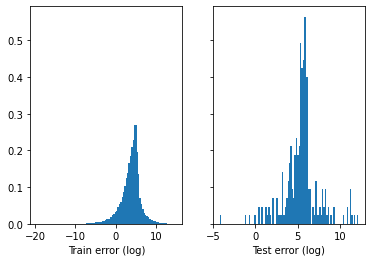

In [27]:
train_square_errors = np.log( (train_labels - multi_model.predict(train_features)) ** 2 )
test_square_errors = np.log( (test_labels - test_predictions) ** 2 )
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharey=True)
train_ax.hist(train_square_errors, bins=100, density=True)
train_ax.set_xlabel("Train error (log)")
test_ax.set_xlabel("Test error (log)")
test_ax.hist(test_square_errors, bins=100, density=True)
plt.show()

**thainhfx16677:** Phân phối sai số bình phương trên tập `training` và trên tập `testing` là gần gần giống nhau. Do đó có thể nhận xét mô hình đang xử dụng có tính khái quát cao. 